<a href="https://colab.research.google.com/github/bahmanravaei/tutorial-for-ML/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Learning

## Regression

### Linear Regression

**Import packages and classes**

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

**Provide data**

In [2]:
x = np.array([10, 30, 50, 70, 90, 110]).reshape((-1, 1))
y = np.array([10, 40, 28, 64, 44, 76])

**` Create a model and fit it`** <br />
We have several option for training a Machine Learning model. Here, we select Linear regression model by calling **LinearRegression()** methoed. Then the model should be trained with method **fit()**. 






In [3]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

**Get results**

You can obtain the coefficient of determination, 𝑅², with .score() called on model. 


---


The attributes of model are .intercept_, which represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁. 


In [4]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7158756137479542
intercept: 11.266666666666659
slope: [0.54]


**Predict response**

In [5]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")


y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[16.66666667 27.46666667 38.26666667 49.06666667 59.86666667 70.66666667]
predicted response:
[[16.66666667]
 [27.46666667]
 [38.26666667]
 [49.06666667]
 [59.86666667]
 [70.66666667]]


**Visualize data and result**

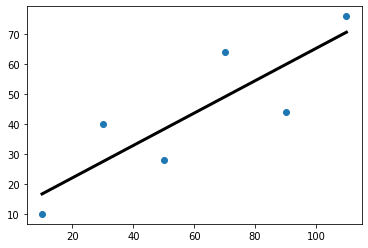

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, y_pred, color="k", linewidth=3)

### Multiple Linear Regression With scikit-learn

** Import packages and classes, and provide data**

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

**Create a model, fit it, and then get results**

In [8]:
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
coefficients: [0.44706965 0.25502548]


**Predict response**

In [9]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [10]:
x_new = np.arange(10).reshape((-1, 2))
y_new = model.predict(x_new)
y_new

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

**Visualize data and result**

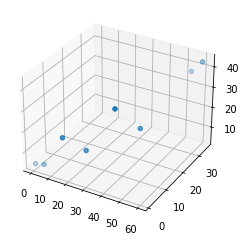

In [11]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(x[:, 0], x[:,1], y)

In [12]:
tempX = np.linspace(0, 60, 600)
tempY = np.linspace(0, 60, 600)
def provideAxes(X, Y):
    T_X, T_Y = np.meshgrid(X, Y)
    T_X=T_X.reshape(-1,1)
    T_Y=T_Y.reshape(-1,1)
    NEW_X=np.concatenate((T_X,T_Y),axis=1)
    return NEW_X




X=provideAxes(tempX, tempY)

def f(x):
    return model.intercept_ + np.sum(model.coef_ * x, axis=1)


Z = f(X)
Z=Z.reshape(600,-1)

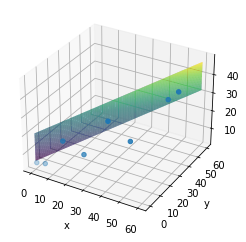

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(tempX, tempY, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.scatter3D(x[:, 0], x[:,1], y)

### Polynomial Regression With scikit-learn


Implementing polynomial regression with scikit-learn is very similar to linear regression. There’s only one extra step: you need to transform the array of inputs to include nonlinear terms such as 𝑥².

*** Import packages and classes***

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**Provide data**

In [15]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

**Transform input data**

In [16]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [17]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [18]:
x_ = transformer.transform(x)

**Create a model and fit it**

In [19]:
model = LinearRegression().fit(x_, y)

**Get results**

In [20]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.8908516262498564
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


**Predict response**

In [21]:
y_pred = model.predict(x_)
print(f"predicted response:\n{y_pred}")

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


**Visualize**

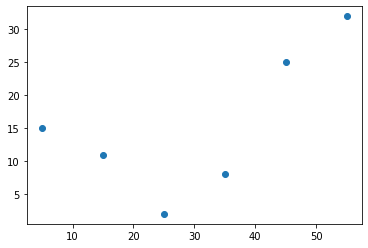

In [22]:
plt.scatter(x,y)

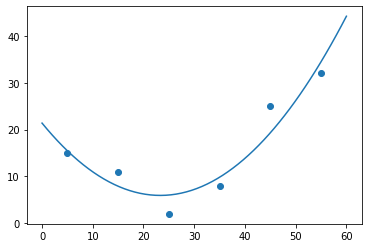

In [23]:
def plotLinearReg(model):
  X_series = np.linspace(0, 60, 60)
  X_series=X_series.reshape((-1, 1))
  X_2 = transformer.transform(X_series)
  Y_series= model.predict(X_2)
  plt.plot(X_series, Y_series)


plt.scatter(x,y)
plotLinearReg(model)

### Polynomial Regression (case of several input variables)

In this case, there are six regression coefficients, including the intercept, as shown in the estimated regression function 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂².

In [24]:
# Step 1: Import packages and classes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict response
y_pred = model.predict(x_)

In [25]:
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {intercept}")

print(f"coefficients:\n{coefficients}")

print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395876
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


#Decision Tree

## 1 - Load iris dataset

In [26]:
"""
Created on Mon Mar  6 21:40:39 2023

@author: bahman
"""
from sklearn import datasets
irisdata=datasets.load_iris()
X=irisdata.data
y=irisdata.target

## 2 - Divide dataset to train_X, test_X, train_y and test_y

In [27]:
#### TRAIN TEST SPLIT ####
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

## 3 - Create learning model with decision tree, then train model

In [28]:
#### CREATE MODEL AND TRAIN IT ####

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

model = DTC.fit(train_X, train_y)


## 4 - Evaluation of model

Confusion Matrix: 


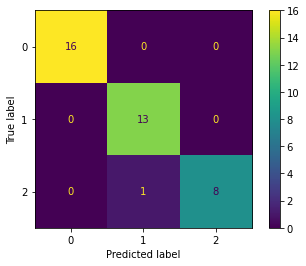

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
predicted_y=model.predict(test_X)
cm=confusion_matrix(test_y,predicted_y)

print ('Confusion Matrix: ')


disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DTC.classes_)
disp.plot()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
print (accuracy_score(test_y, predicted_y)*100, '%')


97.36842105263158 %


## 5 - Feature Importance

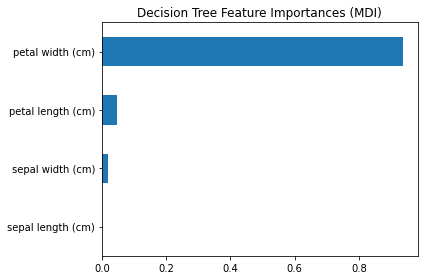

In [31]:
from sklearn.inspection import permutation_importance
import pandas as pd
feature_names = irisdata.feature_names

mdi_importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("Decision Tree Feature Importances (MDI)")
ax.figure.tight_layout()

## 6 - Visualising Tree structure

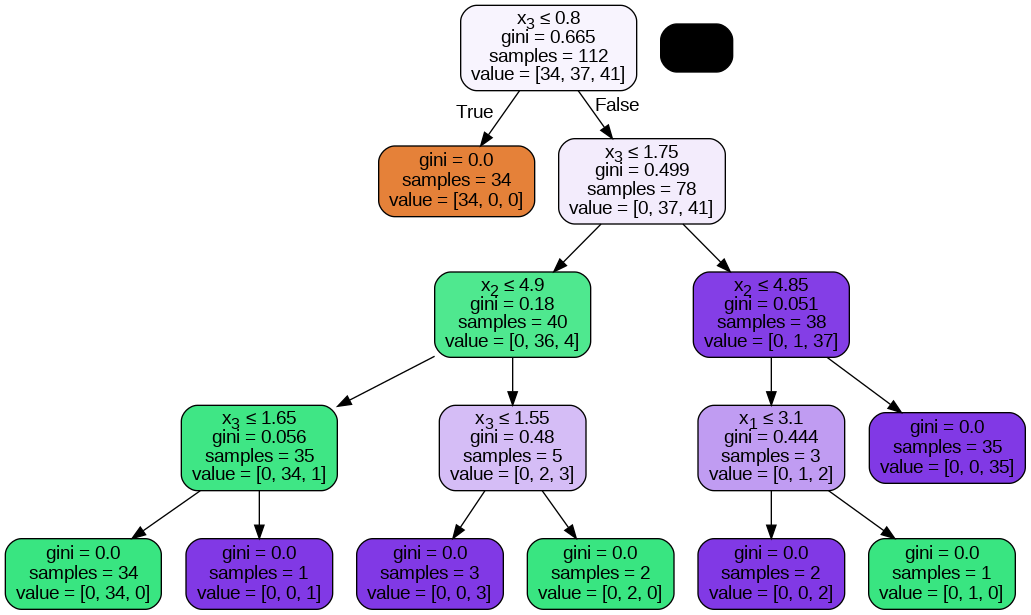

In [32]:

from six import StringIO

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())